# UAS Comprehensive SDGs Project Report
- **Nama:** Jovan Torio
- **NIM:** 03082220026
- **Kelas:** 22TI1
- **Mata Kuliah:** Frontier Technology

## SDG yang diberikan adalah SDG10: Berkuranganya Kesenjangan
## Metadata Indikator yang digunakan: 
10.1.1.(a) Rasio Gini <Br>
10.1.1.(b)
Persentase penduduk yang hidup di bawah garis kemiskinan nasional, menurut jenis kelamin dan kelompok umur

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# fungsi untuk meload file csv berdasarkan nama
def loadFiles(name):
    folder_path = 'data'
    dfs = []
    for filename in os.listdir(folder_path):
        if filename.startswith(name):
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)
            dfs.append(df)
    return dfs

In [3]:
dfsGRKota = loadFiles('GR Kota')
dfsGRProvinsi = loadFiles('GR Provinsi')
dfsP0Provinsi = loadFiles('P0 Provinsi')

In [4]:
dfsGRKota[0].head(10)

,Kabupaten Kota,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,GINI RATIO SUMATERA UTARA MENURUT KABUPATEN/KOTA,NaN,NaN
1,NaN,2016,2017.0000,2018.0000
2,Sumatera Utara,0.319,0.3150,0.3176
3,Nias,0.2735,0.2491,0.2645
4,Mandailing Natal,0.27,0.2523,0.2574
5,Tapanuli Selatan,0.2729,0.2528,0.2727
6,Tapanuli Tengah,0.3062,0.3058,0.3174
7,Tapanuli Utara,0.3087,0.3289,0.2819
8,Toba,0.3077,0.2922,0.3279
9,Labuhan Batu,0.3082,0.2792,0.2936


In [5]:
dfsGRProvinsi[0].head(10)

,38 Provinsi,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,Gini Ratio Menurut Provinsi dan Daerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Perkotaan,NaN,NaN,Perdesaan,NaN,NaN,Perkotaan+Perdesaan,NaN,NaN
2,NaN,2018,NaN,NaN,2018,NaN,NaN,2018,NaN,NaN
3,NaN,Semester 1 (Maret),Semester 2 (September),Tahunan,Semester 1 (Maret),Semester 2 (September),Tahunan,Semester 1 (Maret),Semester 2 (September),Tahunan
4,ACEH,0.344,0.338,-,0.285,0.273,-,0.325,0.318,-
5,SUMATERA UTARA,0.335,0.33,-,0.272,0.257,-,0.318,0.311,-
6,SUMATERA BARAT,0.338,0.308,-,0.28,0.262,-,0.321,0.305,-
7,RIAU,0.356,0.379,-,0.288,0.292,-,0.327,0.347,-
8,JAMBI,0.354,0.351,-,0.308,0.295,-,0.334,0.335,-
9,SUMATERA SELATAN,0.381,0.354,-,0.316,0.296,-,0.358,0.341,-


In [6]:
dfsP0Provinsi[0].head(10)

,Daerah,2016,2017,2018
0,ACEH,16.73,16.89,15.97
1,Simeulue,19.93,20.2,19.78
2,Aceh Singkil,21.6,22.11,21.25
3,Aceh Selatan,13.48,14.07,14.01
4,Aceh Tenggara,14.46,14.86,14.29
5,Aceh Timur,15.06,15.25,14.49
6,Aceh Tengah,16.64,16.84,15.58
7,Aceh Barat,20.38,20.28,19.31
8,Aceh Besar,15.55,15.41,14.47
9,Pidie,21.25,21.43,20.47


## Data Cleaning Gini Rasio Skala Kota di Sumatera Utara

In [7]:
def convertColumnsToINT(df):
    new_columns = []
    for col in df.columns:
        if col != 'Wilayah' or col != 'Daerah':
            try:
                new_columns.append(int(col))
            except (ValueError, TypeError):
                new_columns.append(col)
        else:
            new_columns.append(col)
    df.columns = new_columns
    return df

In [8]:
def cleanGRKota(df):
    # set row tahun jadi header, hapus row pertama dan kedua
    df.columns = df.iloc[1]
    df = df.iloc[2:]
    
    # rename kolom pertama
    df = df.rename(columns={df.columns[0]: 'Wilayah'})
    
    # hapus row yang ada "Sumatera Utara"
    df = df[df['Wilayah'] != 'Sumatera Utara']

    # konversi nama kolom menjadi int karena beberapa masih float
    df = convertColumnsToINT(df)

    # hapus kolom 2016 dan 2017 karena tidak diperlukan 
    cols_to_drop = [2016, 2017]
    
    if all(col in df.columns for col in cols_to_drop):
        df = df.drop(columns=cols_to_drop)

    return df

In [9]:
# bersihkan setiap df gr kota (ada 3 file)
dfsGRKota = [cleanGRKota(df) for df in dfsGRKota]

# merge semua df gr kota menjadi satu df
dfGRKota = dfsGRKota[0]
for df in dfsGRKota[1:]:
    dfGRKota = pd.merge(dfGRKota, df, on='Wilayah', how='outer')

In [10]:
dfGRKota

,Wilayah,2018,2019,2020,2021,2022,2023,2024
0,Asahan,0.2912,0.2793,0.2605,0.2441,0.255,0.260,0.248
1,Batu Bara,0.2494,0.2773,0.2592,0.2396,0.243,0.255,0.258
2,Binjai,0.3085,0.3511,0.3244,0.2903,0.302,0.318,0.312
3,Dairi,0.2649,0.2873,0.2706,0.2268,0.221,0.241,0.215
4,Deli Serdang,0.2935,0.2732,0.3120,0.2628,0.27,0.295,0.262
5,Gunungsitoli,0.3608,0.3183,0.3223,0.3166,0.303,0.308,0.277
6,Humbang Hasundutan,0.2909,0.2893,0.2464,0.3043,0.258,0.256,0.302
7,Karo,0.2682,0.2642,0.2706,0.2327,0.236,0.240,0.214
8,Labuanbatu Utara,0.2819,0.2668,0.2624,0.2431,0.276,0.238,0.239
9,Labuhan Batu,0.2936,0.2767,0.2715,0.2564,0.278,0.244,0.251


## Data Cleaning Gini Rasio Skala Indonesia (Semua Provinsi)

In [11]:
def cleanDfGRProvinsi(df, nama):
    # set baris ke-4 (index 3) sebagai header kolom
    df.columns = df.iloc[3]

    # hapus 4 baris pertama (termasuk baris header lama)
    df = df[4:]

    # ganti "-" dengan nan (nilai kosong)
    df = df.replace("-", np.nan)
    
    # ambil kolom pertama (wilayah) dan 3 kolom terakhir
    df = df.iloc[:, [0] + list(range(-3, 0))]
    
    # konversi kolom nilai ke numeric (angka)
    df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
    
    # rename kolom pertama menjadi 'Wilayah'
    df = df.rename(columns={df.columns[0]: 'Wilayah'})
    
    # hitung rata-rata dari 2 kolom terakhir (skip nilai kosong)
    df[nama] = df.iloc[:, [1, 2]].mean(axis=1, skipna=True)
    
    # ambil hanya kolom wilayah dan hasil rata-rata
    df = df.iloc[:, [0, -1]]

    # konversi nama kolom tahun ke integer (jika bisa)
    df = convertColumnsToINT(df)
    
    return df

In [12]:
years = [str(year) for year in range(2018, 2025)]
# bersihkan setiap df gr provinsi dan isi kolom tahun dengan rata-rata dari 2 kolom terakhir
dfsGRProvinsi = [cleanDfGRProvinsi(df, nama) for df, nama in zip(dfsGRProvinsi, years)]

In [13]:
# merge semua df gr provinsi menjadi satu df
dfGRProvinsi = dfsGRProvinsi[0]

for df in dfsGRProvinsi[1:]:
    dfGRProvinsi = pd.merge(dfGRProvinsi, df, on='Wilayah', how='outer')

In [14]:
dfGRProvinsi

,Wilayah,2018,2019,2020,2021,2022,2023,2024
0,ACEH,0.3215,0.32,0.321,0.3235,0.301,0.296,0.294
1,BALI,0.3705,0.368,0.369,0.3765,0.3625,0.362,0.3545
2,BANTEN,0.376,0.363,0.364,0.364,0.37,0.368,0.356
3,BENGKULU,0.3585,0.3345,0.3285,0.3235,0.315,0.333,0.3425
4,DI YOGYAKARTA,0.4315,0.4255,0.4355,0.4385,0.449,0.449,0.4315
5,DKI JAKARTA,0.392,0.3925,0.3995,0.41,0.4175,0.431,0.427
6,GORONTALO,0.41,0.4085,0.407,0.4085,0.4205,0.417,0.4135
7,INDONESIA,0.3865,0.381,0.383,0.3825,0.3825,0.388,0.38
8,JAMBI,0.3345,0.3225,0.318,0.318,0.3275,0.343,0.318
9,JAWA BARAT,0.406,0.4,0.4005,0.409,0.4145,0.425,0.4245


In [15]:
# Combine dfGRProvinsi and dfGRKota menjadi dfGR
dfGR = pd.concat([dfGRKota, dfGRProvinsi], ignore_index=True)


In [16]:
dfGR

,Wilayah,2018,2019,2020,2021,2022,2023,2024
0,Asahan,0.2912,0.2793,0.2605,0.2441,0.255,0.26,0.248
1,Batu Bara,0.2494,0.2773,0.2592,0.2396,0.243,0.255,0.258
2,Binjai,0.3085,0.3511,0.3244,0.2903,0.302,0.318,0.312
3,Dairi,0.2649,0.2873,0.2706,0.2268,0.221,0.241,0.215
4,Deli Serdang,0.2935,0.2732,0.312,0.2628,0.27,0.295,0.262
...,...,...,...,...,...,...,...,...
67,SULAWESI TENGGARA,0.4005,0.396,0.3885,0.392,0.3765,0.371,0.3675
68,SULAWESI UTARA,0.383,0.3715,0.369,0.362,0.362,0.37,0.3535
69,SUMATERA BARAT,0.313,0.3065,0.303,0.303,0.296,0.28,0.285
70,SUMATERA SELATAN,0.3495,0.335,0.3385,0.3405,0.3345,0.338,0.332


## Data Cleaning Tingkat Kemiskinan Skala Indonesia (Provinsi dan Daerah-daerahnya)

In [17]:
def cleanDfP0Provinsi(df):
    # hapus duplikat berdasarkan kolom 'daerah' (pertahankan yang pertama)
    df = df.drop_duplicates(subset='Daerah', keep='first')

    # cari index untuk 'sumatera utara' dan 'sumatera barat'
    start_idx = df[df['Daerah'] == 'SUMATERA UTARA'].index
    end_idx = df[df['Daerah'] == 'SUMATERA BARAT'].index

    # ambil data (kota sumatera utara) antara sumatera utara dan sumatera barat
    if not start_idx.empty and not end_idx.empty:
        df_daerah_sumut = df.loc[start_idx[0]+1:end_idx[0]-1]

    # ambil data provinsi (ditandai dengan nama daerah uppercase)
    df_provinsi = df[df['Daerah'].str.isupper()]

    # gabungkan data sumut dan provinsi
    df_gabungan = pd.concat([df_daerah_sumut, df_provinsi], ignore_index=True)

    # konversi nama kolom tahun ke integer
    df_gabungan = convertColumnsToINT(df_gabungan)

    # hapus kolom 2016 dan 2017 karena tidak diperlukan 
    cols_to_drop = [2016, 2017]
    
    if all(col in df_gabungan.columns for col in cols_to_drop):
        df_gabungan = df_gabungan.drop(columns=cols_to_drop)

    return df_gabungan

In [18]:
dfsP0Provinsi = [cleanDfP0Provinsi(df) for df in dfsP0Provinsi]

In [19]:
# merge semua df p0 provinsi menjadi dfp0
dfP0 = dfsP0Provinsi[0]

for df in dfsP0Provinsi[1:]:
    dfP0 = pd.merge(dfP0, df, on='Daerah', how='outer')

In [20]:
dfP0

,Daerah,2018,2019,2020,2021,2022,2023,2024
0,ACEH,15.97,15.32,14.99,15.33,14.64,14.45,14.23
1,Asahan,10.25,9.68,9.04,9.35,8.64,8.21,8.12
2,BALI,4.01,3.79,3.78,4.53,4.57,4.25,4
3,BANTEN,5.24,5.09,5.92,6.66,6.16,6.17,5.84
4,BENGKULU,15.43,15.23,15.03,15.22,14.62,14.04,13.56
...,...,...,...,...,...,...,...,...
66,Simalungun,9.31,8.81,8.46,8.81,8.26,7.87,7.72
67,Tapanuli Selatan,9.16,8.6,8.47,8.8,8.07,7.01,6.92
68,Tapanuli Tengah,13.17,12.53,12.38,12.67,11.71,11.5,11.8
69,Tapanuli Utara,9.75,9.48,9.37,9.72,8.93,8.54,8.21


## Pembersihan dfGR, dfP0 dan penggabungan kedua data.

In [21]:
dfP0.sort_values(by='Daerah', inplace=True)
print(dfP0.to_string())

                   Daerah   2018   2019   2020   2021   2022   2023   2024
0                    ACEH  15.97  15.32  14.99  15.33  14.64  14.45  14.23
1                  Asahan  10.25   9.68   9.04   9.35   8.64   8.21   8.12
2                    BALI   4.01   3.79   3.78   4.53   4.57   4.25      4
3                  BANTEN   5.24   5.09   5.92   6.66   6.16   6.17   5.84
4                BENGKULU  15.43  15.23  15.03  15.22  14.62  14.04  13.56
5               Batu Bara  12.57  12.14  11.88  12.38  11.53  11.38  10.94
6          D I YOGYAKARTA  12.13   11.7  12.28   12.8  11.34  11.04  10.83
7             DKI JAKARTA   3.57   3.47   4.53   4.72   4.69   4.44    4.3
8                   Dairi    8.2    7.7   8.04   8.31   7.88   7.47    7.1
9            Deli Serdang   4.13   3.89   3.88   4.01   3.62   3.44   3.44
10              GORONTALO  16.81  15.52  15.22  15.61  15.42  15.15  14.57
11     Humbang Hasundutan      9   8.75   9.36   9.65   8.86   8.69   8.44
12                  JAMBI

In [22]:
dfGR.sort_values(by='Wilayah', inplace=True)

print(dfGR.to_string())

                 Wilayah    2018    2019    2020    2021    2022   2023    2024
33                  ACEH  0.3215    0.32   0.321  0.3235   0.301  0.296   0.294
0                 Asahan  0.2912  0.2793  0.2605  0.2441   0.255   0.26   0.248
34                  BALI  0.3705   0.368   0.369  0.3765  0.3625  0.362  0.3545
35                BANTEN   0.376   0.363   0.364   0.364    0.37  0.368   0.356
36              BENGKULU  0.3585  0.3345  0.3285  0.3235   0.315  0.333  0.3425
1              Batu Bara  0.2494  0.2773  0.2592  0.2396   0.243  0.255   0.258
2                 Binjai  0.3085  0.3511  0.3244  0.2903   0.302  0.318   0.312
37         DI YOGYAKARTA  0.4315  0.4255  0.4355  0.4385   0.449  0.449  0.4315
38           DKI JAKARTA   0.392  0.3925  0.3995    0.41  0.4175  0.431   0.427
3                  Dairi  0.2649  0.2873  0.2706  0.2268   0.221  0.241   0.215
4           Deli Serdang  0.2935  0.2732   0.312  0.2628    0.27  0.295   0.262
39             GORONTALO    0.41  0.4085

In [23]:
# membandingkan dfGR dan dfP0 berdasarkan kolom 'Wilayah' dan 'Daerah' untuk mencari yang tidak ada di satu sama lain df
dfNama = pd.merge(dfP0['Daerah'], dfGR['Wilayah'], left_on='Daerah', right_on='Wilayah', how='outer')

# print hanya yang ada NaN (tidak ada di dfGR atau dfP0)
print(dfNama[dfNama.isna().any(axis=1)].to_string())

                   Daerah              Wilayah
6                     NaN               Binjai
7          D I YOGYAKARTA                  NaN
8                     NaN        DI YOGYAKARTA
13                    NaN         Gunungsitoli
15                    NaN            INDONESIA
26                    NaN            KEP. RIAU
27         KEPULAUAN RIAU                  NaN
29            Kota Binjai                  NaN
30      Kota Gunungsitoli                  NaN
31             Kota Medan                  NaN
32   Kota Padangsidimpuan                  NaN
33  Kota Pematang Siantar                  NaN
34           Kota Sibolga                  NaN
35     Kota Tanjung Balai                  NaN
36     Kota Tebing Tinggi                  NaN
38                    NaN     Labuanbatu Utara
40   Labuhan Batu Selatan                  NaN
41     Labuhan Batu Utara                  NaN
42                    NaN  Labuhanbatu Selatan
47                    NaN                Medan
62           

In [24]:
# fungsi untuk mengganti kata dalam kolom DataFrame
def replaceWords(df, column, old_word, new_word):
    df[column] = df[column].str.replace(old_word, new_word, regex=False)
    return df

In [25]:
# ganti kata agar sesuai dengan satu sama df. 
dfP0 = replaceWords(dfP0, 'Daerah', 'Kota ', '')
dfP0 = replaceWords(dfP0, 'Daerah', 'D I YOGYAKARTA', 'DI YOGYAKARTA')
dfP0 = replaceWords(dfP0, 'Daerah', 'KEP.', 'KEPULAUAN')
dfP0 = replaceWords(dfP0, 'Daerah', ' Samosir', '')

dfGR = replaceWords(dfGR, 'Wilayah', 'KEP.', 'KEPULAUAN')
dfGR = replaceWords(dfGR, 'Wilayah', 'Labuanbatu ', 'Labuhan Batu ')
dfGR = replaceWords(dfGR, 'Wilayah', 'Labuhanbatu ', 'Labuhan Batu ')
dfGR = replaceWords(dfGR, 'Wilayah', 'Pematangsiantar', 'Pematang Siantar')
dfGR = replaceWords(dfGR, 'Wilayah', 'Tanjungbalai', 'Tanjung Balai')

# tidak ada indonesia di dfP0 jadi hapus dari dfGR juga. 
dfGR = dfGR[~dfGR['Wilayah'].str.contains('INDONESIA', na=False)]

In [26]:
dfNama = pd.merge(dfP0['Daerah'], dfGR['Wilayah'], left_on='Daerah', right_on='Wilayah', how='outer')


# konfirmasi ulang apakah masih ada yang tidak ada di dfGR atau dfP0
print(dfNama[dfNama.isna().any(axis=1)].to_string())

Empty DataFrame
Columns: [Daerah, Wilayah]
Index: []


In [27]:
#cek apakah ada yang NaN di dfP0
print(dfP0[dfP0.isna().any(axis=1)].to_string())

Empty DataFrame
Columns: [Daerah, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Index: []


In [28]:
# cek apakah ada yang NaN di dfGR
print(dfGR[dfGR.isna().any(axis=1)].to_string())

             Wilayah 2018 2019 2020 2021 2022 2023    2024
59  PAPUA BARAT DAYA  NaN  NaN  NaN  NaN  NaN  NaN  0.3465
60  PAPUA PEGUNUNGAN  NaN  NaN  NaN  NaN  NaN  NaN   0.343
61     PAPUA SELATAN  NaN  NaN  NaN  NaN  NaN  NaN   0.414
62      PAPUA TENGAH  NaN  NaN  NaN  NaN  NaN  NaN   0.368


In [29]:
# karena di dfGR data wilayah" ini tidak lengkap, maka hapus dari dfP0 dan dfGR. 
dfP0 = dfP0[~dfP0['Daerah'].str.contains('PAPUA', na=False)]
dfGR = dfGR[~dfGR['Wilayah'].str.contains('PAPUA', na=False)] 

In [30]:
# konfirmasi ulang apakah masih ada yang tidak ada di dfGR atau dfP0
print(dfGR[dfGR.isna().any(axis=1)].to_string())

Empty DataFrame
Columns: [Wilayah, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Index: []


In [31]:
# gabung semua data tahun ke dalam 1 kolom.
dfGR_melted = dfGR.melt(id_vars=['Wilayah'], var_name='Tahun', value_name='GR')
dfP0_melted = dfP0.melt(id_vars=['Daerah'], var_name='Tahun', value_name='P0')

# rename kolom 'Wilayah' menjadi 'Daerah' di dfGR_melted (tadi namanya dibedakan agar bisa dibandingkan ada yan sama atau tidak)
dfGR_melted = dfGR_melted.rename(columns={'Wilayah': 'Daerah'})

In [32]:
# sort by Tahun, kemudian sort by wilayah. 
dfGR_melted.sort_values(by=['Tahun', 'Daerah'], inplace=True)
dfP0_melted.sort_values(by=['Tahun', 'Daerah'], inplace=True)

In [33]:
# merge dfGR dan dfP0 berdasarkan kolom 'Daerah' dan 'Tahun', sort, dan reset indexnya. 
df = pd.merge(dfP0_melted, dfGR_melted, on=['Daerah', 'Tahun'], how='outer').sort_values(by=['Tahun', 'Daerah']).reset_index(drop=True)


In [34]:
# konversi 'P0' dan 'GR' ke numerik. 
df['P0'] = pd.to_numeric(df['P0'], errors='coerce')
df['GR'] = pd.to_numeric(df['GR'], errors='coerce')

# bagi nilai P0 yang berupa persen dengan 100 agar menjadi desimal
df['P0'] = df['P0'] / 100

In [35]:
print(df.to_string())

                        Daerah Tahun      P0      GR
0                         ACEH  2018  0.1597  0.3215
1                       Asahan  2018  0.1025  0.2912
2                         BALI  2018  0.0401  0.3705
3                       BANTEN  2018  0.0524  0.3760
4                     BENGKULU  2018  0.1543  0.3585
5                    Batu Bara  2018  0.1257  0.2494
6                       Binjai  2018  0.0588  0.3085
7                DI YOGYAKARTA  2018  0.1213  0.4315
8                  DKI JAKARTA  2018  0.0357  0.3920
9                        Dairi  2018  0.0820  0.2649
10                Deli Serdang  2018  0.0413  0.2935
11                   GORONTALO  2018  0.1681  0.4100
12                Gunungsitoli  2018  0.1844  0.3608
13          Humbang Hasundutan  2018  0.0900  0.2909
14                       JAMBI  2018  0.0792  0.3345
15                  JAWA BARAT  2018  0.0745  0.4060
16                 JAWA TENGAH  2018  0.1132  0.3675
17                  JAWA TIMUR  2018  0.1098  

# Analisis

## Melakukan Exploratory Data Analysis

In [36]:
df.describe()

,P0,GR
count,455.000000,455.000000
mean,0.100473,0.307878
std,0.043922,0.053670
min,0.034400,0.193500
25%,0.072550,0.262000
50%,0.088100,0.309000
75%,0.120500,0.342000
max,0.267200,0.449000


In [37]:
df['Skala'] = np.where(df['Daerah'].str.isupper(), 'Provinsi', 'Kota')
df['Skala'].value_counts()

Skala
Kota        231
Provinsi    224
Name: count, dtype: int64

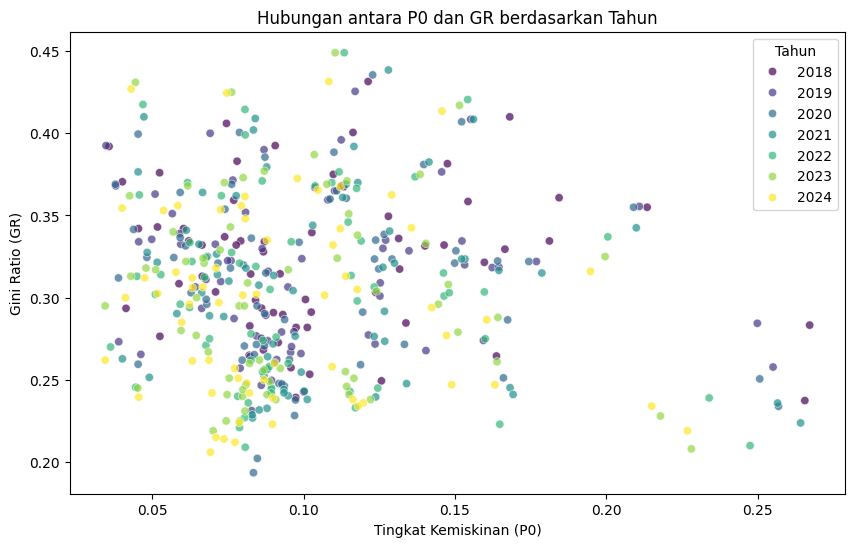

In [38]:
# membuat scatter plot dengan warna berdasarkan tahun
plt.figure(figsize=(10, 6))

scatter = sns.scatterplot(
    data=df, 
    x='P0', 
    y='GR', 
    hue='Tahun', 
    palette='viridis', 
    alpha=0.7
)

# tambahkan judul dan label
plt.title('Hubungan antara P0 dan GR berdasarkan Tahun')
plt.xlabel('Tingkat Kemiskinan (P0)')
plt.ylabel('Gini Ratio (GR)')

# tambahkan legenda
plt.legend(
    title='Tahun'
)

plt.show()

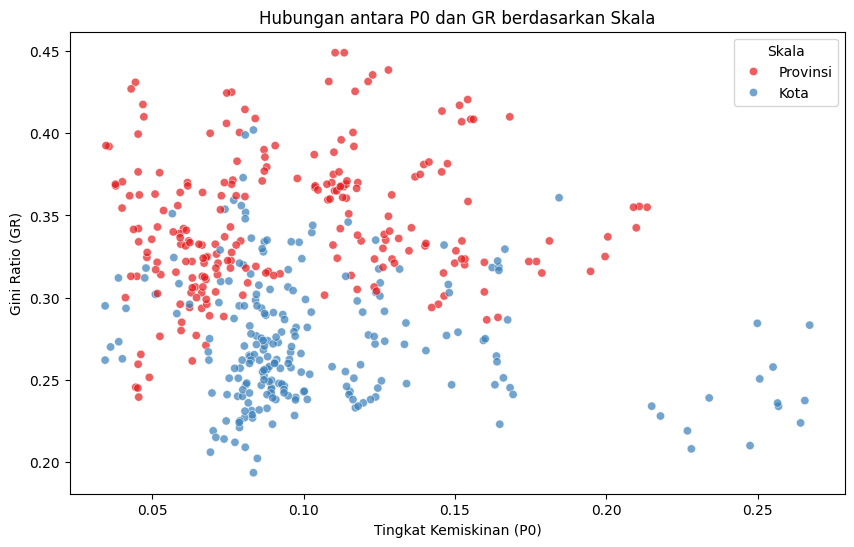

In [39]:
# membuat scatter plot dengan warna berdasarkan skala
plt.figure(figsize=(10, 6))

scatter = sns.scatterplot(
    data=df, 
    x='P0', 
    y='GR', 
    hue='Skala', 
    palette='Set1', 
    alpha=0.7
)

# tambahkan judul dan label
plt.title('Hubungan antara P0 dan GR berdasarkan Skala')
plt.xlabel('Tingkat Kemiskinan (P0)')
plt.ylabel('Gini Ratio (GR)')

# tambahkan legenda
plt.legend(
    title='Skala',
    loc='upper right'
)

plt.show()


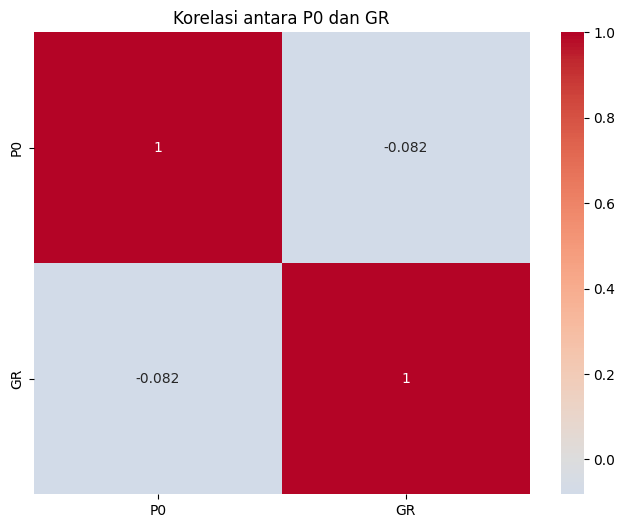

In [40]:
# membuat korelasi matrix antara P0 dan GR
corr_matrix = df[['P0', 'GR']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Korelasi antara P0 dan GR')
plt.show()

In [41]:
# silhouette score
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

X = df[['P0', 'GR']].values

# Test k from 1 to 15
inertia = []
silhouette_scores = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    if k > 1:
        silhouette_avg = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)

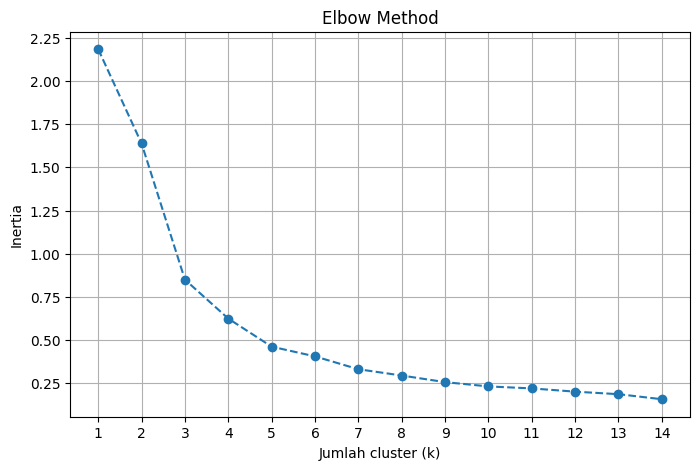

In [42]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 15), inertia, marker='o', linestyle='--')
plt.xlabel('Jumlah cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(range(1, 15))
plt.grid()
plt.show()

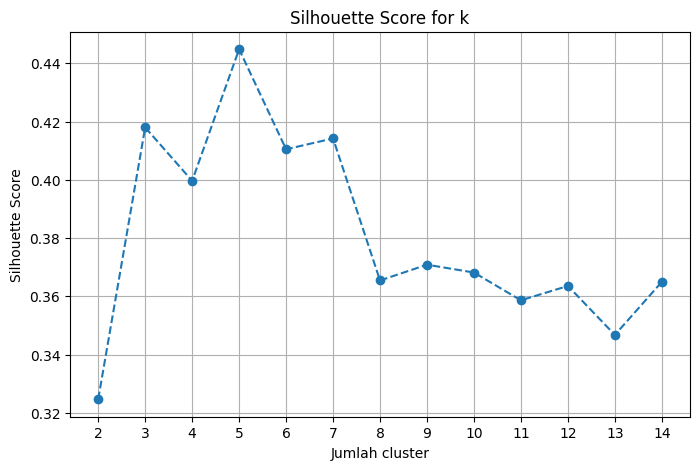

In [43]:
# plot silhouette score
plt.figure(figsize=(8, 5))
plt.plot(range(2, 15), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Jumlah cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for k')
plt.xticks(range(2, 15))
plt.grid()
plt.show()

In [44]:
# standarisasi dengan standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df[['P0', 'GR']].values
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.34994295e+00,  2.54085600e-01],
       [ 4.62015186e-02, -3.11097950e-01],
       [-1.37606186e+00,  1.16807880e+00],
       [-1.09571187e+00,  1.27066987e+00],
       [ 1.22686247e+00,  9.44243731e-01],
       [ 5.74991749e-01, -1.09079011e+00],
       [-9.49838701e-01,  1.15976083e-02],
       [ 4.74703947e-01,  2.30590707e+00],
       [-1.47634966e+00,  1.56911663e+00],
       [-4.21048470e-01, -8.01669811e-01],
       [-1.34871064e+00, -2.68196229e-01],
       [ 1.54140148e+00,  1.90486924e+00],
       [ 1.91292220e+00,  9.87145453e-01],
       [-2.38707011e-01, -3.16693827e-01],
       [-4.84867981e-01,  4.96573592e-01],
       [-5.91993588e-01,  1.83025755e+00],
       [ 2.90083220e-01,  1.11212003e+00],
       [ 2.12588100e-01,  1.25201695e+00],
       [-5.19057004e-01,  4.49941286e-01],
       [-1.25526064e+00,  6.36470511e-01],
       [-1.11166675e+00,  6.55123433e-01],
       [-9.15649677e-01,  6.36470511e-01],
       [-6.74047244e-01, -8.16670040e-02],
       [-1.

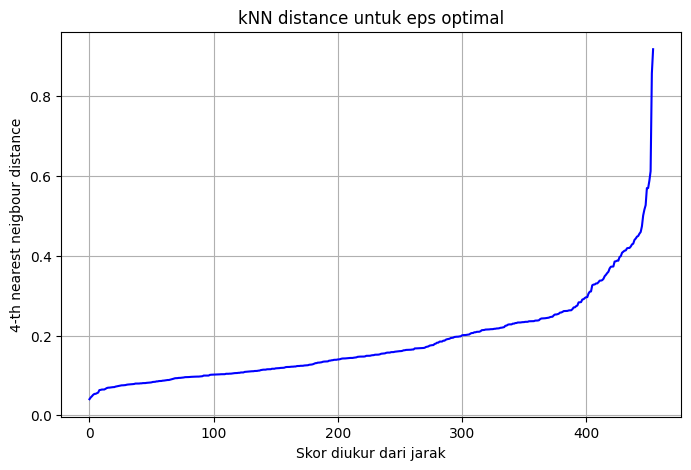

In [45]:
from sklearn.neighbors import NearestNeighbors
k = 4

# hitung jarak k-nearest neighbors
nbrs = NearestNeighbors(n_neighbors=k + 1).fit(X_scaled)
distances, _ = nbrs.kneighbors(X_scaled)

# ekstrak jarak ke k-th tetangga terdekat
kth_distances = distances[:, k]
sorted_kth_distances = np.sort(kth_distances)

# plot
plt.figure(figsize=(8, 5))
plt.plot(sorted_kth_distances, color='blue')
plt.xlabel('Skor diukur dari jarak')
plt.ylabel(f'{k}-th nearest neigbour distance')
plt.title('kNN distance untuk eps optimal')
plt.grid(True)
plt.show()

In [46]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=4)
db_cluster = dbscan.fit_predict(X_scaled)
df['DBCluster'] = db_cluster

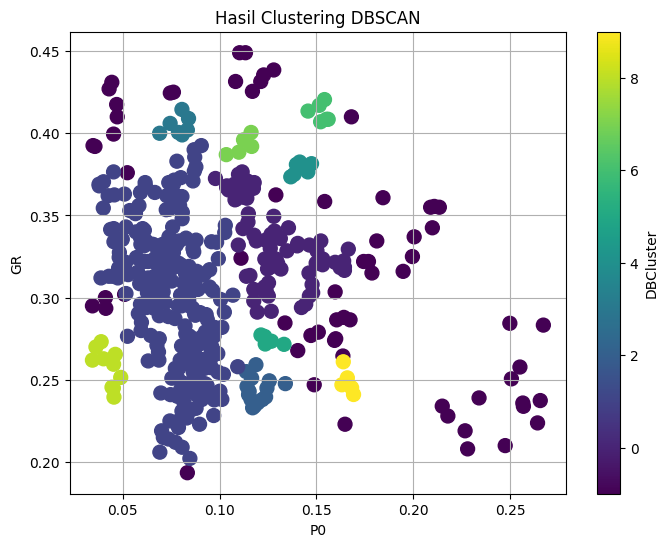

In [47]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['P0'], df['GR'], c=df['DBCluster'], cmap='viridis', s=100)
plt.xlabel('P0')
plt.ylabel('GR')
plt.title('Hasil Clustering DBSCAN')
plt.colorbar(scatter, label='DBCluster')
plt.grid(True)
plt.show()

In [48]:
# kmeans dengan k = 5
kmeans = KMeans(n_clusters=5)
df['Cluster'] = kmeans.fit_predict(X_scaled)
label = df['Cluster']

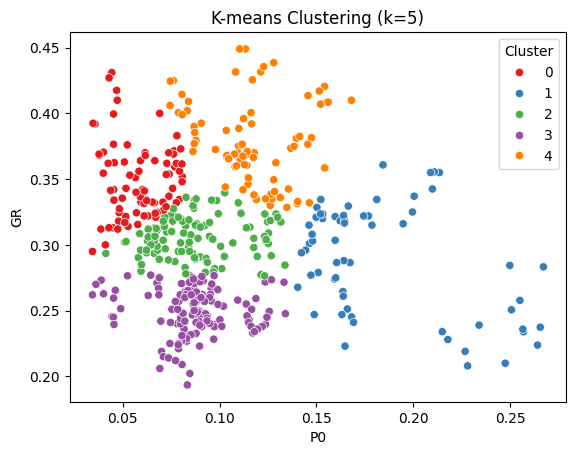

In [49]:
# plot k means
sns.scatterplot(data=df, x='P0', y='GR', hue='Cluster', palette='Set1')
plt.title('K-means Clustering (k=5)')
plt.show()

In [50]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

silhouette_db = silhouette_score(X_scaled, db_cluster)
davies_db = davies_bouldin_score(X_scaled, db_cluster)
calinski_db = calinski_harabasz_score(X_scaled, db_cluster)

silhouette_kmeans = silhouette_score(X_scaled, label)
davies_kmeans = davies_bouldin_score(X_scaled, label)
calinski_kmeans = calinski_harabasz_score(X_scaled, label)

In [51]:
# DBSCAN vs KMeans
print(f"DBSCAN Silhouette Score: {silhouette_db:.4f} & KMeans Silhouette Score: {silhouette_kmeans:.4f}")
print(f"DBSCAN Davies Bouldin Score: {davies_db:.4f} & KMeans Davies Bouldin Score: {davies_kmeans:.4f}")
print(f"DBSCAN Calinski Harabasz Score: {calinski_db:.4f} & KMeans Calinski Harabasz Score: {calinski_kmeans:.4f}")

DBSCAN Silhouette Score: -0.0630 & KMeans Silhouette Score: 0.3391
DBSCAN Davies Bouldin Score: 1.8470 & KMeans Davies Bouldin Score: 0.9142
DBSCAN Calinski Harabasz Score: 32.7115 & KMeans Calinski Harabasz Score: 325.5352


In [74]:
# 1. Group by cluster, get unique regions and calculate min/max P0/GR
cluster_stats = (
    df.groupby('Cluster')
    .agg({
        'Daerah': lambda x: list(set(x)),  # Remove duplicates
        'P0': ['min', 'max'],
        'GR': ['min', 'max']
    })
    .reset_index()
)

# 2. Flatten column names
cluster_stats.columns = [
    'Cluster', 
    'Wilayah', 
    'P0_min', 
    'P0_max', 
    'GR_min', 
    'GR_max'
]

# 3. Print formatted results
for _, row in cluster_stats.iterrows():
    print(f"Cluster {row['Cluster']}:")
    print("-" * 30)
    print("Wilayah:")
    print(", ".join(row['Wilayah']))
    print(f"Tingkat Kemiskinan (P0) - Min: {row['P0_min']:.3f}, Max: {row['P0_max']:.3f}")
    print(f"Gini Ratio (GR) - Min: {row['GR_min']:.3f}, Max: {row['GR_max']:.3f}")
    print("\n" + "=" * 50 + "\n")

Cluster 0:
------------------------------
Wilayah:
JAWA BARAT, SULAWESI SELATAN, KALIMANTAN TENGAH, RIAU, MALUKU UTARA, Pematang Siantar, Deli Serdang, KALIMANTAN BARAT, Binjai, Toba, Medan, DKI JAKARTA, JAMBI, BALI, Padangsidimpuan, BANTEN, SULAWESI UTARA, KALIMANTAN SELATAN, KEPULAUAN RIAU, KALIMANTAN TIMUR
Tingkat Kemiskinan (P0) - Min: 0.034, Max: 0.081
Gini Ratio (GR) - Min: 0.295, Max: 0.431


Cluster 1:
------------------------------
Wilayah:
MALUKU, Nias, Nias Utara, ACEH, Nias Barat, BENGKULU, Gunungsitoli, Tanjung Balai, NUSA TENGGARA TIMUR, Nias Selatan
Tingkat Kemiskinan (P0) - Min: 0.140, Max: 0.267
Gini Ratio (GR) - Min: 0.208, Max: 0.361


Cluster 2:
------------------------------
Wilayah:
SULAWESI TENGAH, Simalungun, Asahan, Pakpak Bharat, Sibolga, SUMATERA SELATAN, Labuhan Batu Utara, KALIMANTAN TENGAH, RIAU, Serdang Bedagai, MALUKU UTARA, Samosir, Pematang Siantar, LAMPUNG, Humbang Hasundutan, Deli Serdang, KALIMANTAN BARAT, Binjai, SUMATERA BARAT, Tapanuli Utara, Lab

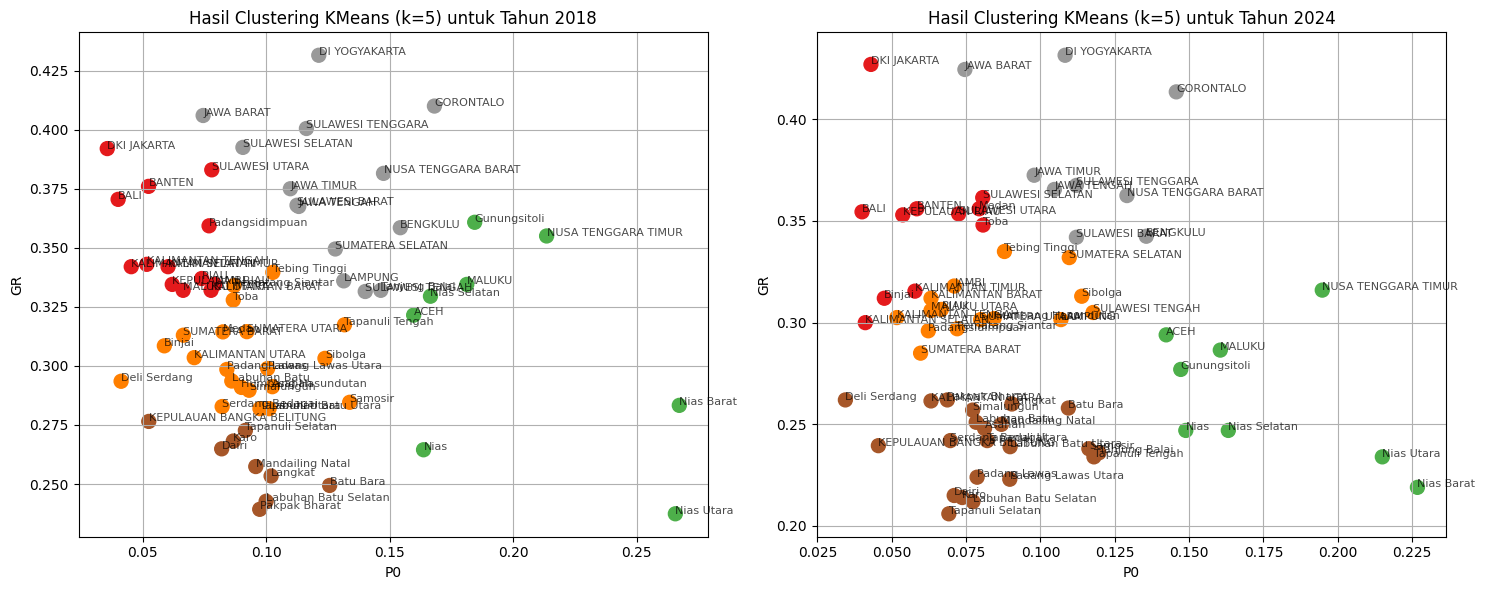

In [57]:
# label wilayah name in plot for year 2018 dan 2024 , colored by cluster
df_2018 = df[df['Tahun'] == 2018]
df_2024 = df[df['Tahun'] == 2024]

# subplot 
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].scatter(df_2018['P0'], df_2018['GR'], c=df_2018['Cluster'], cmap='Set1', s=100)
axes[0].set_title('Hasil Clustering KMeans (k=5) untuk Tahun 2018')
axes[0].set_xlabel('P0')
axes[0].set_ylabel('GR')
for i, row in df_2018.iterrows():
    axes[0].annotate(row['Daerah'], (row['P0'], row['GR']), fontsize=8, alpha=0.7)
axes[0].grid(True)

axes[1].scatter(df_2024['P0'], df_2024['GR'], c=df_2024['Cluster'], cmap='Set1', s=100)
axes[1].set_title('Hasil Clustering KMeans (k=5) untuk Tahun 2024')
axes[1].set_xlabel('P0')
axes[1].set_ylabel('GR')
for i, row in df_2024.iterrows():
    axes[1].annotate(row['Daerah'], (row['P0'], row['GR']), fontsize=8, alpha=0.7)
axes[1].grid(True)
plt.tight_layout()
plt.show()


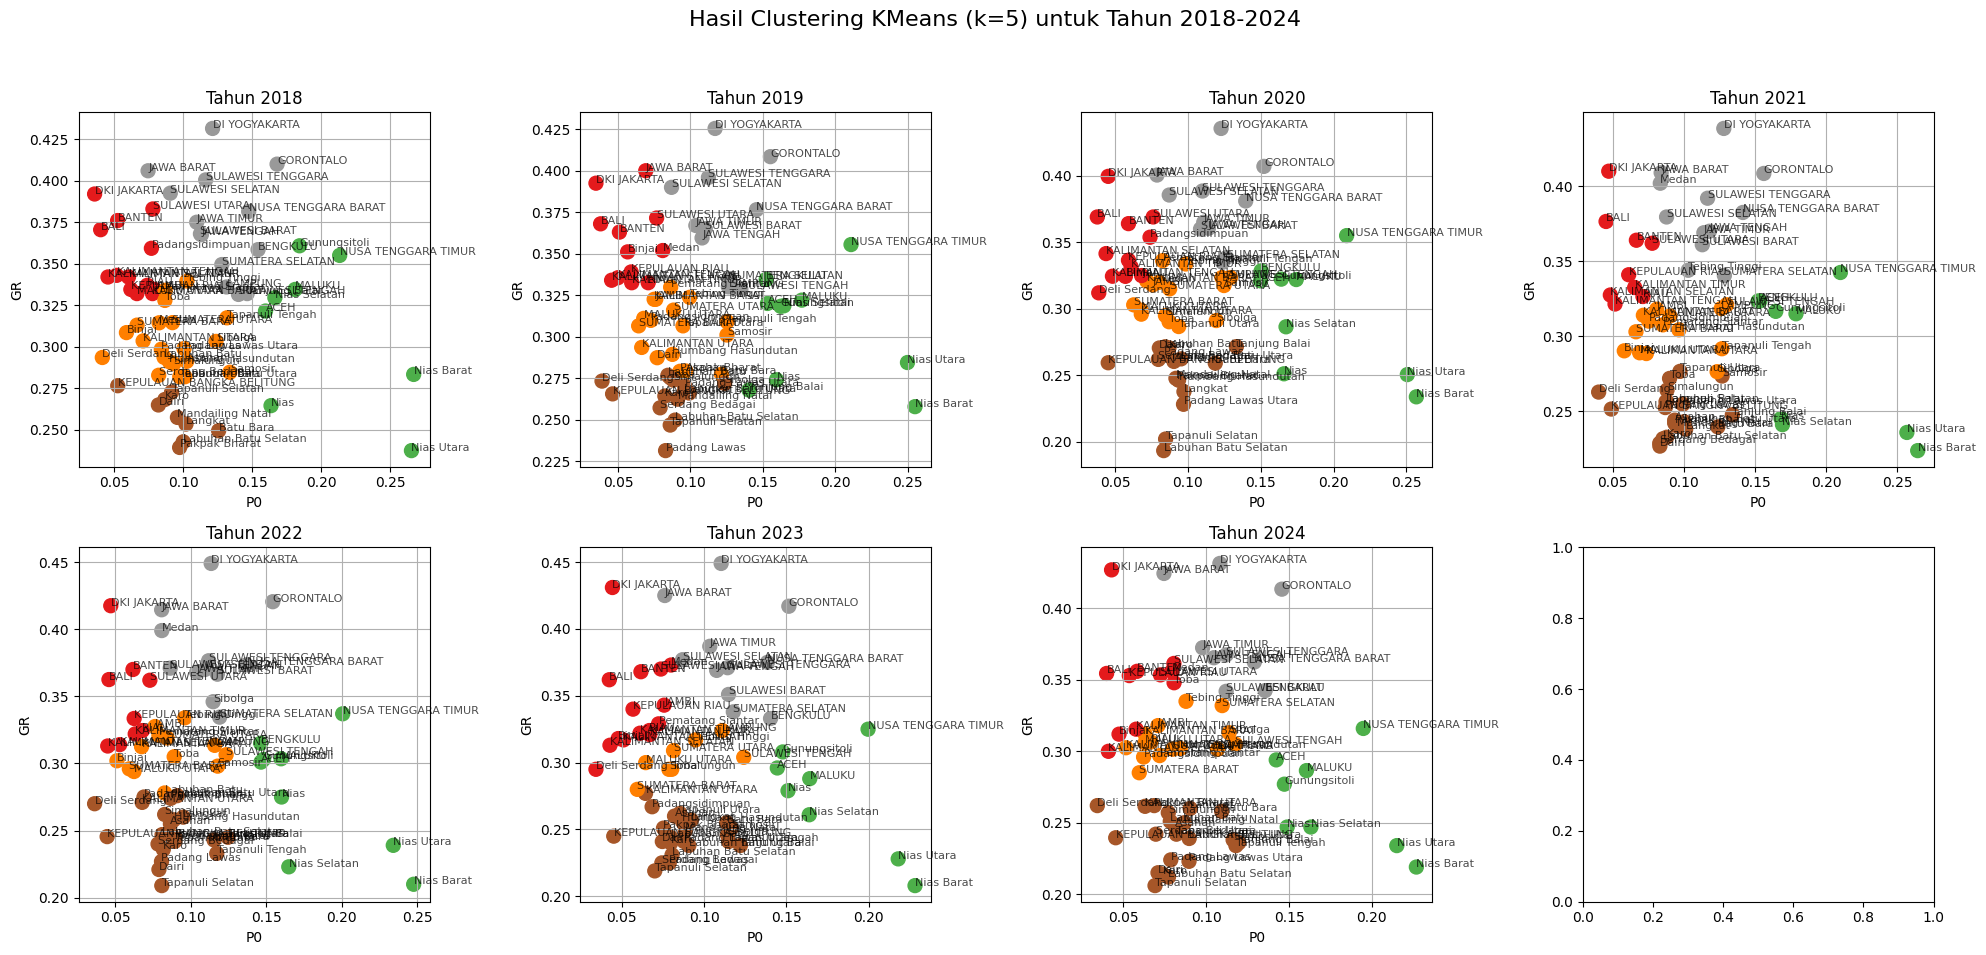

In [56]:
# plot untuk tahun 2018,  2019, 2020, 2021, 2022, 2023, 2024, colored by cluster in a grid
# use loop and list
years = [2018, 2019, 2020, 2021, 2022, 2023, 2024]
df_years = [df[df['Tahun'] == year] for year in years]

# create subplots for each year
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Hasil Clustering KMeans (k=5) untuk Tahun 2018-2024', fontsize=16)
axes = axes.flatten()  # flatten the 2D array of axes to 1D for easy indexing
for i, df_year in enumerate(df_years):
    axes[i].scatter(df_year['P0'], df_year['GR'], c=df_year['Cluster'], cmap='Set1', s=100)
    for j, row in df_year.iterrows():
        axes[i].annotate(row['Daerah'], (row['P0'], row['GR']), fontsize=8, alpha=0.7)
    axes[i].set_title(f'Tahun {years[i]}')
    axes[i].set_xlabel('P0')
    axes[i].set_ylabel('GR')
    axes[i].grid(True)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # adjust layout to make room for the suptitle
plt.show()


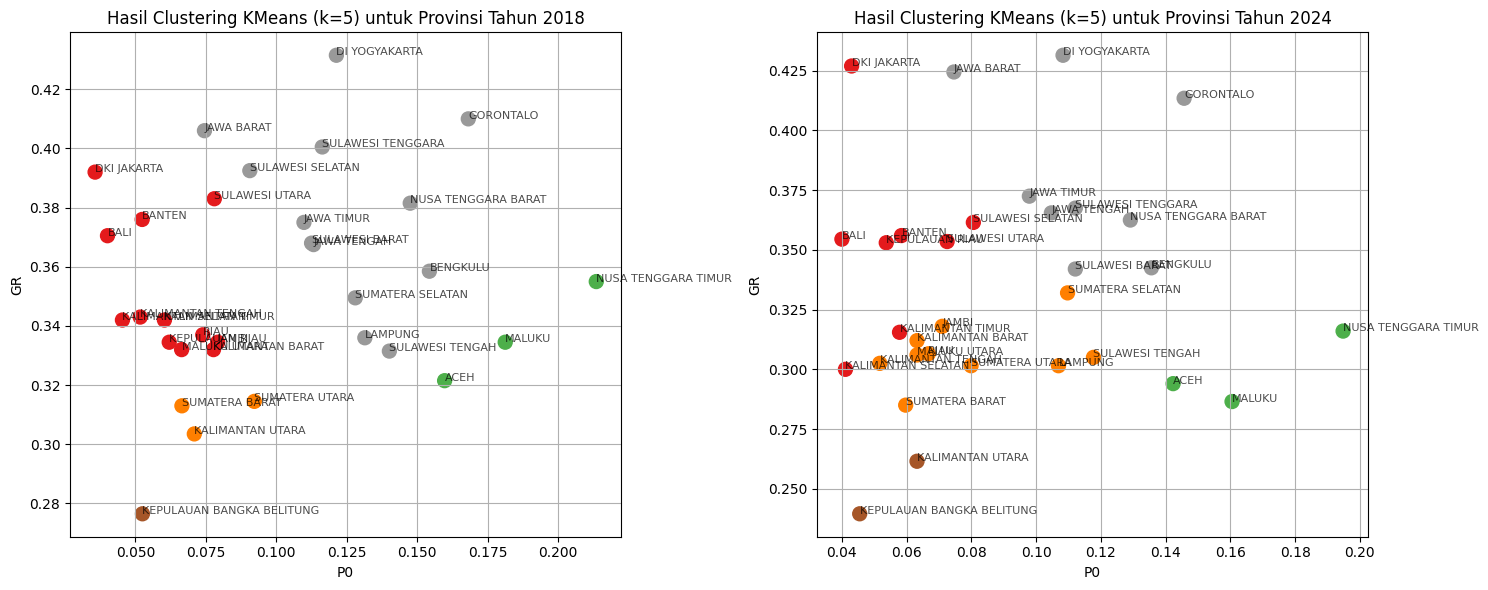

In [58]:
# Plot hanya yang df[Skala] == 'Provinsi' dan tahun 2018 vs tahun 2018
df_provinsi_2018 = df[(df['Skala'] == 'Provinsi') & (df['Tahun'] == 2018)]
df_provinsi_2024 = df[(df['Skala'] == 'Provinsi') & (df['Tahun'] == 2024)]
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].scatter(df_provinsi_2018['P0'], df_provinsi_2018['GR'], c=df_provinsi_2018['Cluster'], cmap='Set1', s=100)
axes[0].set_title('Hasil Clustering KMeans (k=5) untuk Provinsi Tahun 2018')
axes[0].set_xlabel('P0')
axes[0].set_ylabel('GR')
for i, row in df_provinsi_2018.iterrows():
    axes[0].annotate(row['Daerah'], (row['P0'], row['GR']), fontsize=8, alpha=0.7)
axes[0].grid(True)

axes[1].scatter(df_provinsi_2024['P0'], df_provinsi_2024['GR'], c=df_provinsi_2024['Cluster'], cmap='Set1', s=100)
axes[1].set_title('Hasil Clustering KMeans (k=5) untuk Provinsi Tahun 2024')
axes[1].set_xlabel('P0')
axes[1].set_ylabel('GR')
for i, row in df_provinsi_2024.iterrows():
    axes[1].annotate(row['Daerah'], (row['P0'], row['GR']), fontsize=8, alpha=0.7)

axes[1].grid(True)
plt.tight_layout()
plt.show()


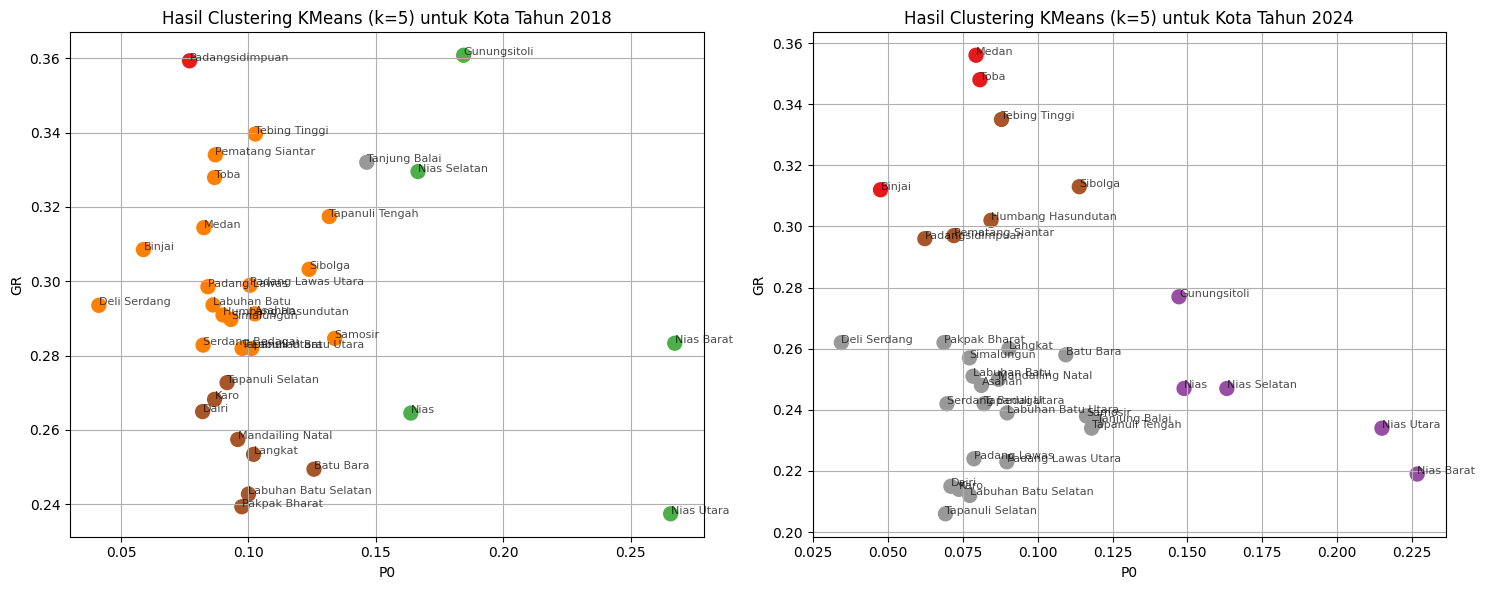

In [61]:
# Plot hanya yang df[Skala] == 'Kota' dan tahun 2018 vs tahun 2018
df_Kota_2018 = df[(df['Skala'] == 'Kota') & (df['Tahun'] == 2018)]
df_Kota_2024 = df[(df['Skala'] == 'Kota') & (df['Tahun'] == 2024)]
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].scatter(df_Kota_2018['P0'], df_Kota_2018['GR'], c=df_Kota_2018['Cluster'], cmap='Set1', s=100)
axes[0].set_title('Hasil Clustering KMeans (k=5) untuk Kota Tahun 2018')
axes[0].set_xlabel('P0')
axes[0].set_ylabel('GR')
for i, row in df_Kota_2018.iterrows():
    axes[0].annotate(row['Daerah'], (row['P0'], row['GR']), fontsize=8, alpha=0.7)
axes[0].grid(True)

axes[1].scatter(df_Kota_2024['P0'], df_Kota_2024['GR'], c=df_Kota_2024['Cluster'], cmap='Set1', s=100)
axes[1].set_title('Hasil Clustering KMeans (k=5) untuk Kota Tahun 2024')
axes[1].set_xlabel('P0')
axes[1].set_ylabel('GR')
for i, row in df_Kota_2024.iterrows():
    axes[1].annotate(row['Daerah'], (row['P0'], row['GR']), fontsize=8, alpha=0.7)

axes[1].grid(True)
plt.tight_layout()
plt.show()
